In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
df = pd.read_csv('E:\\Program Files\\HR_comma_sep.csv', index_col=None)

In [5]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [6]:
# 重命名
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [7]:
# 将预测标签‘是否离职’放在第一列
front = df['turnover']
df.drop(labels=['turnover'], axis=1, inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [8]:
# 离职率
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [9]:
# 分组的平均数据统计
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


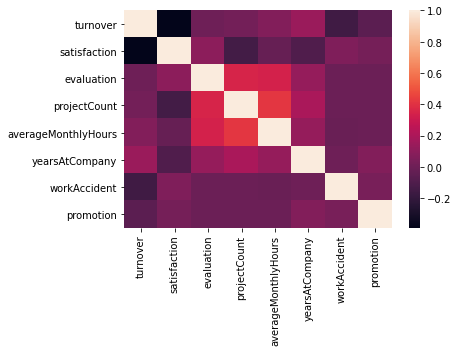

In [10]:
# 相关性矩阵
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [11]:
# 比较离职和未离职员工的满意度
emp_population = df['satisfaction'][df['turnover'] == 0].mean()
emp_turnover_satisfaction = df['satisfaction'][df['turnover']==1].mean()

print( '未离职员工满意度: ' + str(emp_population))
print( '离职员工满意度: ' + str(emp_turnover_satisfaction) )

未离职员工满意度: 0.666809590479524
离职员工满意度: 0.4400980117614114


In [14]:
import scipy.stats as stats
# 满意度的t-Test，比较两者的差异度
stats.ttest_1samp(a = df[df['turnover']==1]['satisfaction'], # 离职员工的满意度样本
                  popmean = emp_population)  # 未离职员工的满意度均值,一般pvalue的值小于0.05时，认为差异显著

Ttest_1sampResult(statistic=-51.33034867547431, pvalue=0.0)

In [17]:
degree_freedom = len(df[df['turnover']==1])
# 临界值
LQ = stats.t.ppf(0.025,degree_freedom)  # 95%致信区间的左边界
RQ = stats.t.ppf(0.975,degree_freedom)  # 95%致信区间的右边界
print ('The t-分布 左边界: ' + str(LQ))
print ('The t-分布 右边界: ' + str(RQ))
df[df['turnover']==1]

The t-分布 左边界: -1.9606285215955626
The t-分布 右边界: 1.9606285215955621


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,1,0.40,0.57,2,151,3,0,0,support,low
14995,1,0.37,0.48,2,160,3,0,0,support,low
14996,1,0.37,0.53,2,143,3,0,0,support,low
14997,1,0.11,0.96,6,280,4,0,0,support,low


Text(0.5, 1.0, '工作评价的概率密度函数 - 离职 V.S. 未离职')

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35780 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-package

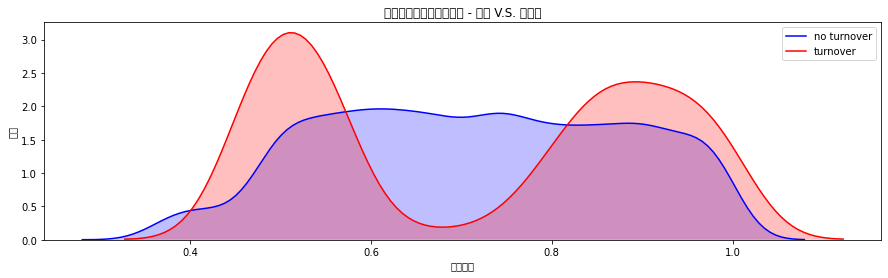

In [35]:
# 工作评价的概率密度函数估计
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='工作评价', ylabel='频率')
plt.title('工作评价的概率密度函数 - 离职 V.S. 未离职')

Text(0.5, 1.0, '月工作时长（时） - 离职 V.S. 未离职')

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-package

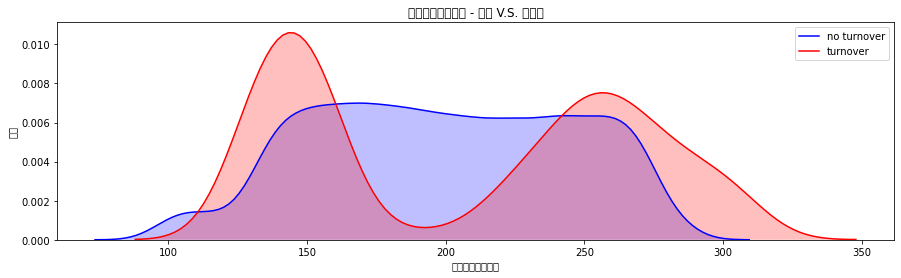

In [11]:

# 月平均工作时长概率密度函数估计
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='月工作时长（时）', ylabel='频率')
plt.title('月工作时长（时） - 离职 V.S. 未离职')

Text(0.5, 1.0, '员工满意度 - 离职 V.S. 未离职')

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 28385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24847 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31163 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-package

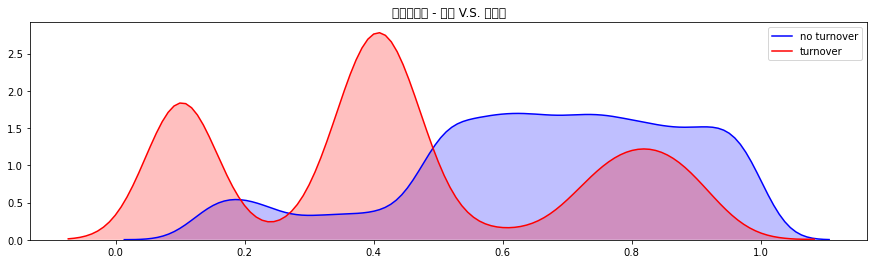

In [14]:

# 员工满意度概率密度函数估计
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('员工满意度 - 离职 V.S. 未离职')

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [16]:
df.describe

<bound method NDFrame.describe of        turnover  satisfaction  evaluation  projectCount  averageMonthlyHours  \
0             1          0.38        0.53             2                  157   
1             1          0.80        0.86             5                  262   
2             1          0.11        0.88             7                  272   
3             1          0.72        0.87             5                  223   
4             1          0.37        0.52             2                  159   
...         ...           ...         ...           ...                  ...   
14994         1          0.40        0.57             2                  151   
14995         1          0.37        0.48             2                  160   
14996         1          0.37        0.53             2                  143   
14997         1          0.11        0.96             6                  280   
14998         1          0.37        0.52             2                  158   

     

In [17]:
df['turnover']

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: turnover, Length: 14999, dtype: int64

In [18]:
# 将string类型转换为整数类型
df["Department"] = df["Department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# 产生X, y，即特征值与目标值
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y = df[target_name]

# 将数据分为训练和测试数据集
# 注意参数 stratify = y 意味着在产生训练和测试数据中, 离职的员工的百分比等于原来总的数据中的离职的员工的百分比
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y)
# 显示前5行数据
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,7,1
1,1,0.80,0.86,5,262,6,0,0,7,2
2,1,0.11,0.88,7,272,4,0,0,7,2
3,1,0.72,0.87,5,223,5,0,0,7,1
4,1,0.37,0.52,2,159,3,0,0,7,1


In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [20]:
# 实例化
dtree = tree.DecisionTreeClassifier(
    criterion='entropy',
    #max_depth=3, # 定义树的深度, 可以用来防止过拟合
    min_weight_fraction_leaf=0.01 # 定义叶子节点最少需要包含多少个样本(使用百分比表达), 防止过拟合
    )
# 训练
dtree = dtree.fit(X_train,y_train)
# 指标计算
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("决策树 AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

决策树 AUC = 0.93
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1714
           1       0.93      0.89      0.91       536

    accuracy                           0.96      2250
   macro avg       0.95      0.93      0.94      2250
weighted avg       0.96      0.96      0.96      2250



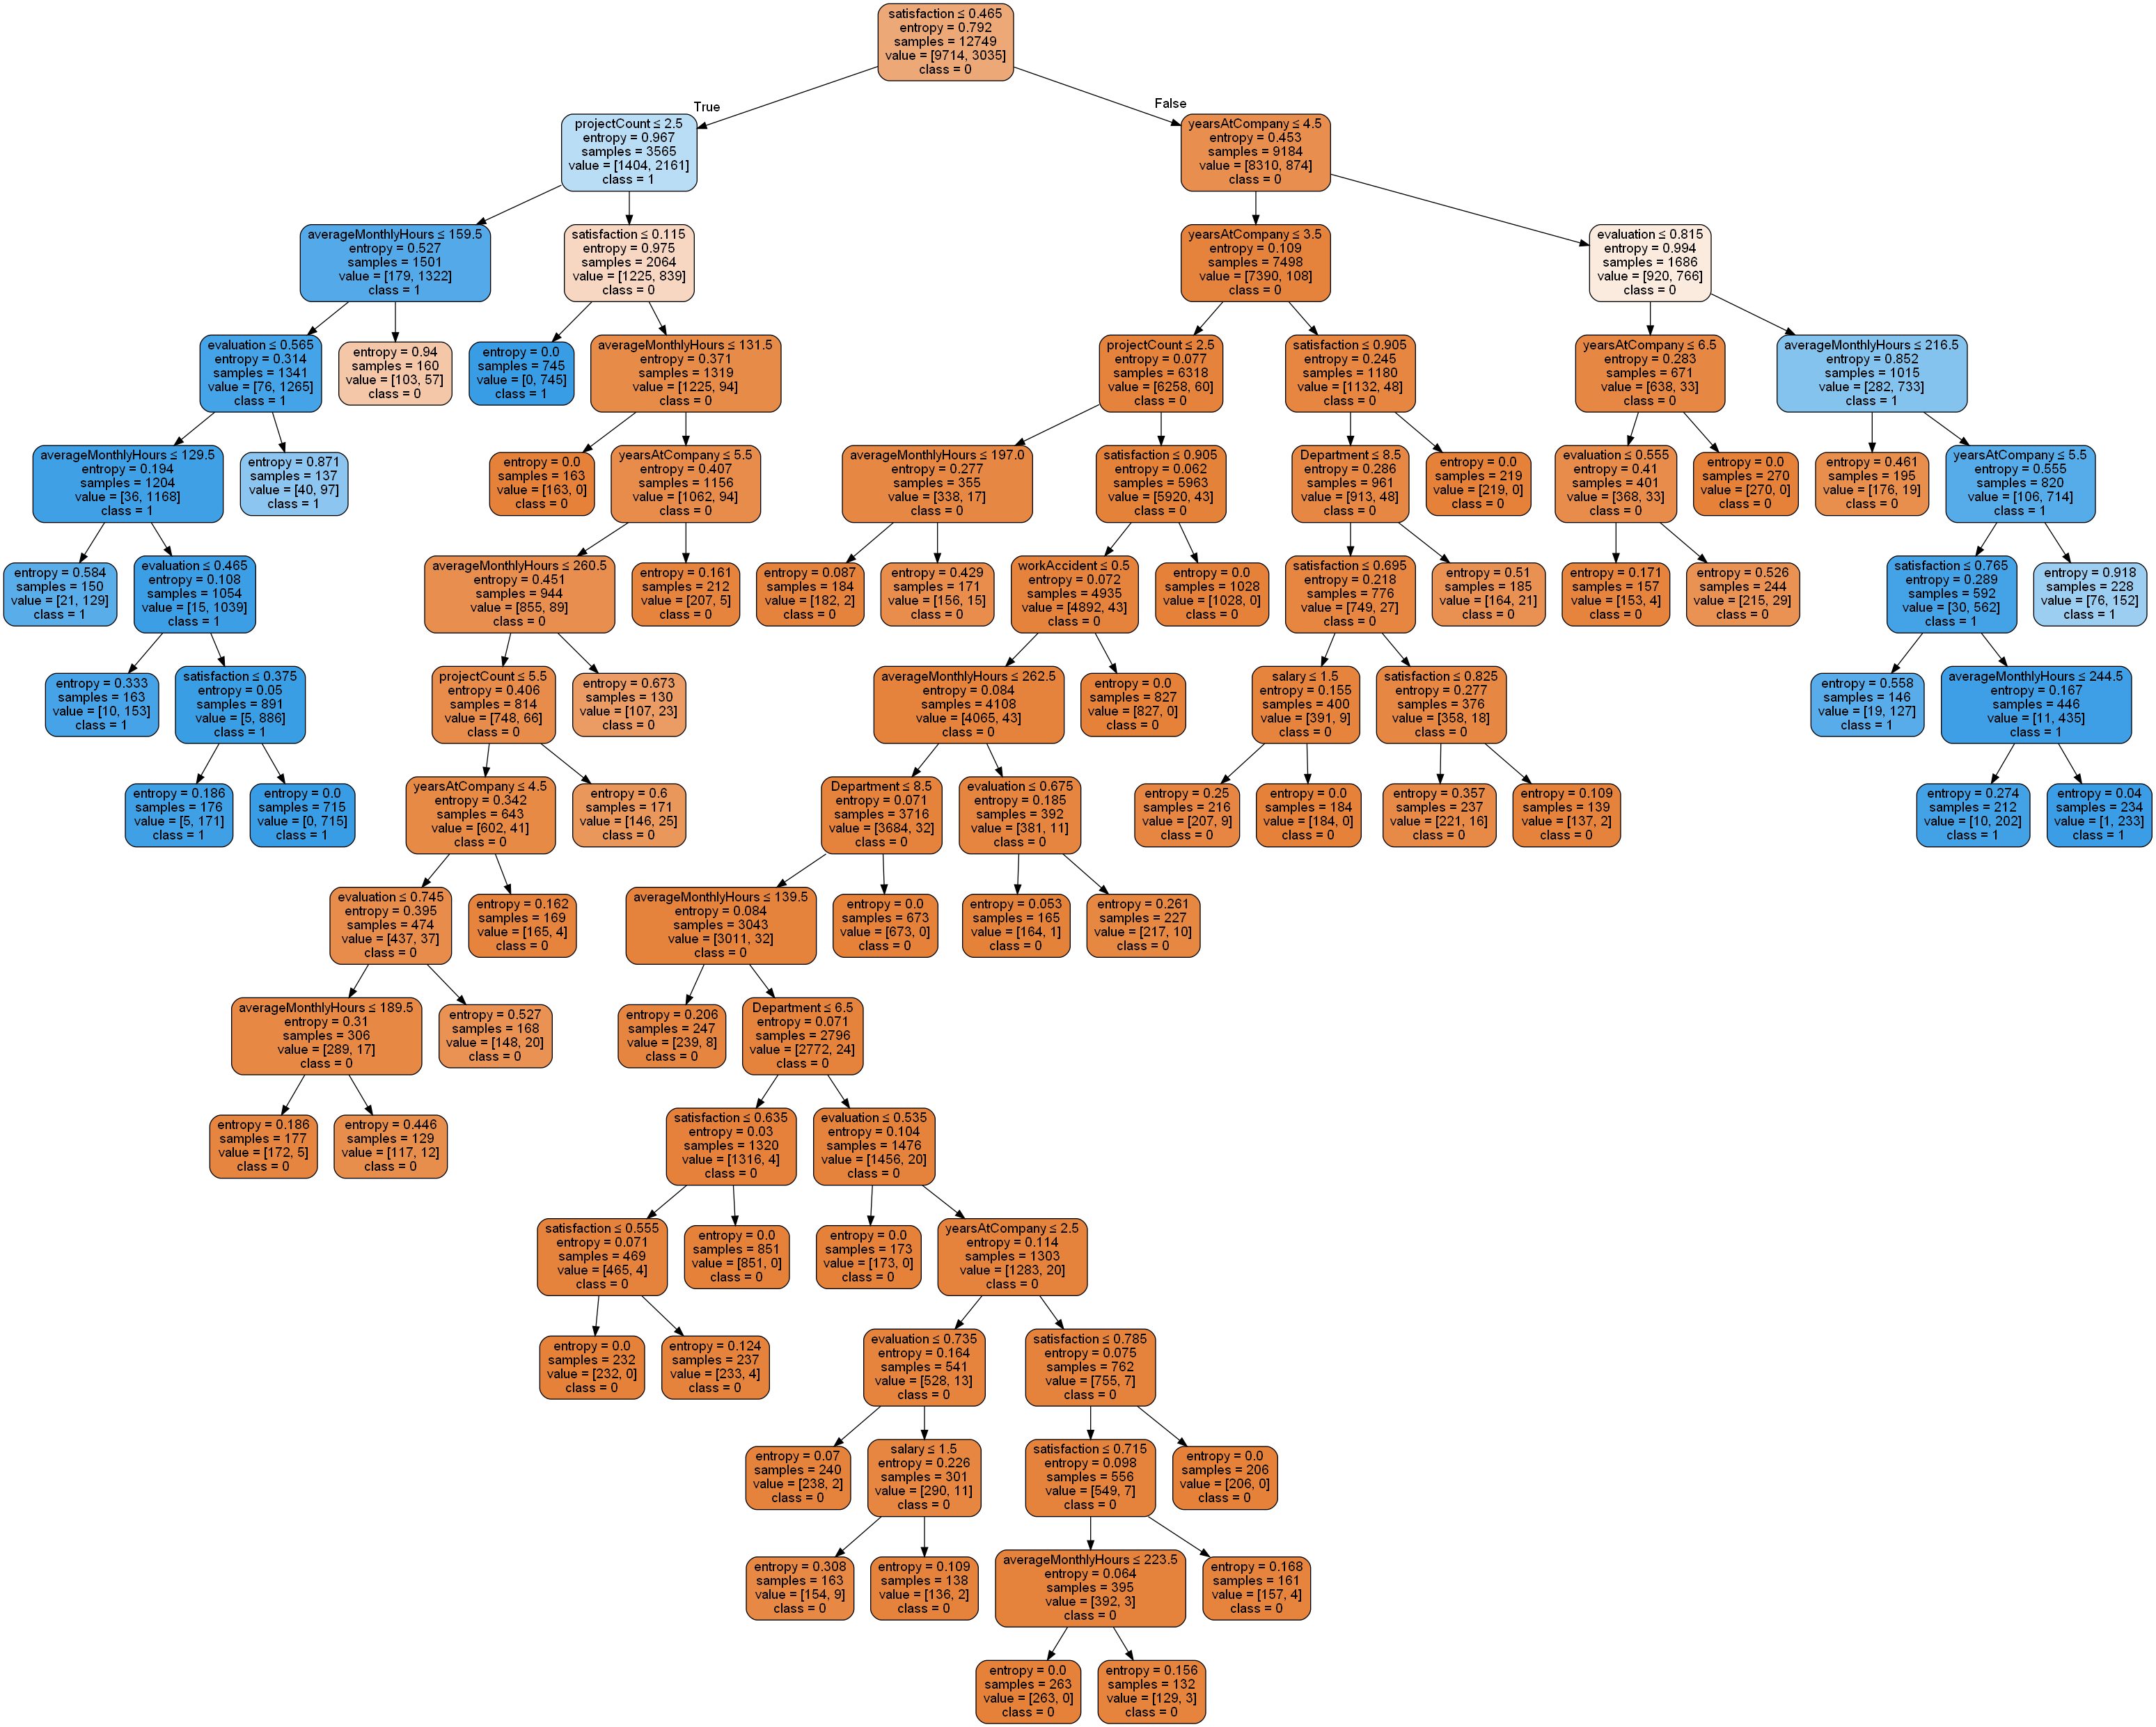

In [21]:
# 需安装GraphViz和pydotplus进行决策树的可视化
# 特征向量
feature_names = df.columns[1:]
# 文件缓存
dot_data = StringIO()
# 将决策树导入到dot中
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
# 将生成的dot文件生成graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# 将结果存入到png文件中
graph.write_png('diabetes.png')
# 显示
Image(graph.create_png())

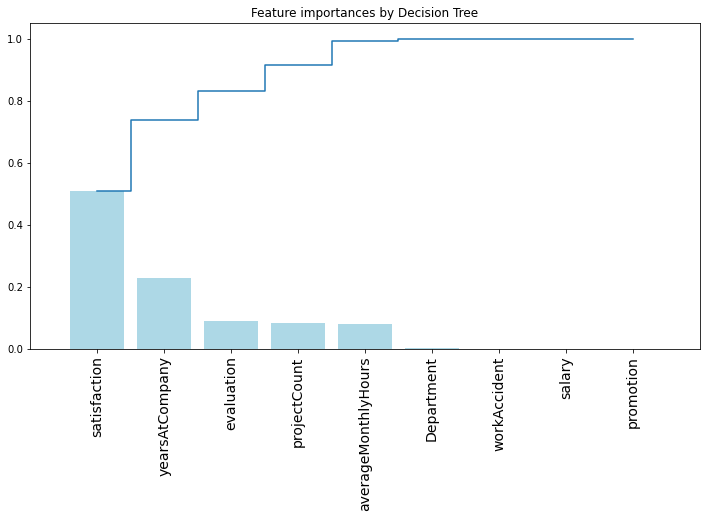

In [22]:

# 获取特征重要性
importances = dtree.feature_importances_
# 获取特征名称
feat_names = df.drop(['turnover'],axis=1).columns
# 排序
indices = np.argsort(importances)[::-1]
# 绘图
plt.figure(figsize=(12,6))
plt.title("Feature importances by Decision Tree")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [23]:
# 实例化随机森林
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=3, 
    max_depth=None, # 定义树的深度, 可以用来防止过拟合
    min_samples_split=10, # 定义至少多少个样本的情况下才继续分叉
    #min_weight_fraction_leaf=0.02 # 定义叶子节点最少需要包含多少个样本(使用百分比表达), 防止过拟合
    )
# 模型训练
rf.fit(X_train, y_train)
# 计算指标参数
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("随机森林 AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))

随机森林 AUC = 0.97
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1714
           1       0.99      0.94      0.96       536

    accuracy                           0.98      2250
   macro avg       0.99      0.97      0.98      2250
weighted avg       0.98      0.98      0.98      2250



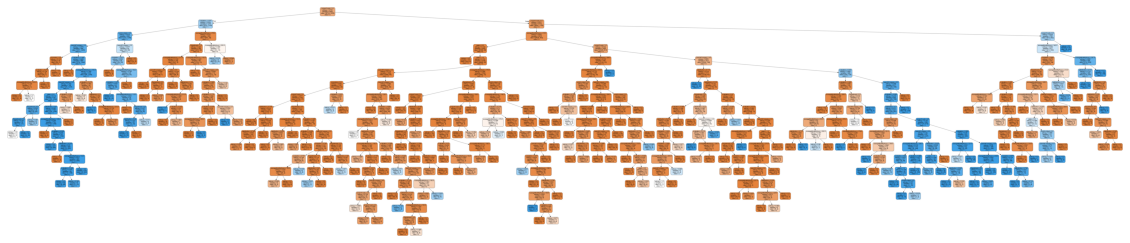

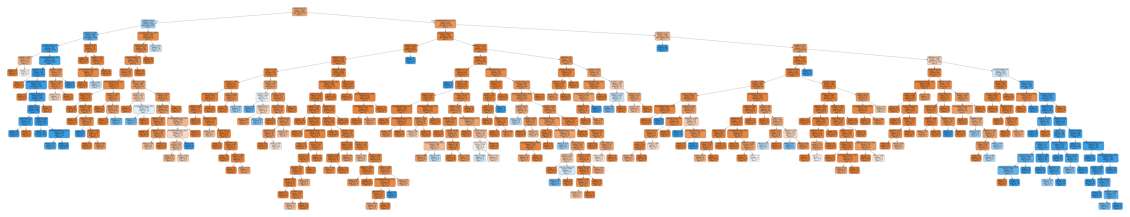

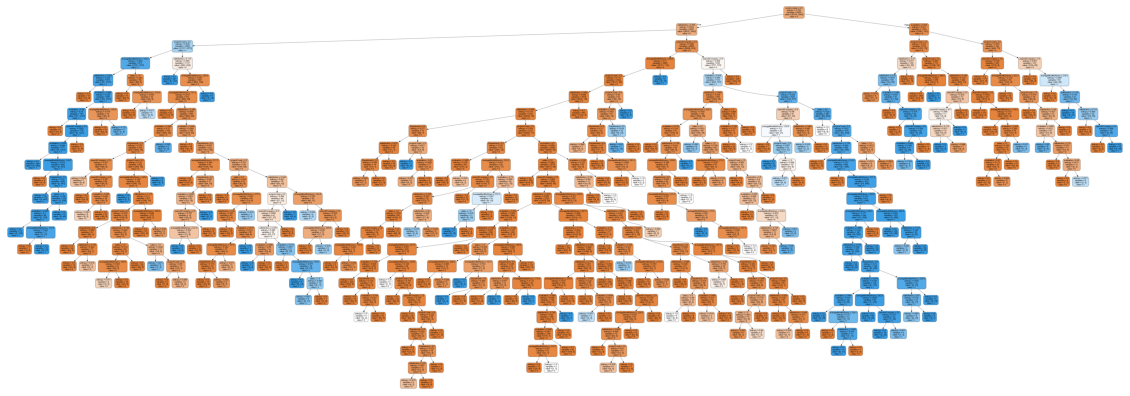

In [24]:
# Graphviz中未提供多棵树的绘制方法，所以我们遍历森林中的树，分别进行绘制
Estimators = rf.estimators_
# 遍历
for index, model in enumerate(Estimators):
    # 文件缓存
    dot_data = StringIO()
    # 将决策树导入到dot_data中
    export_graphviz(model , out_file=dot_data,
                         feature_names=df.columns[1:],
                         class_names=['0','1'],
                         filled=True, rounded=True,
                         special_characters=True)
    # 从数据中生成graph
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    # 将结果写入到png文件中
    graph.write_png('Rf{}.png'.format(index))
    # 绘制图像
    plt.figure(figsize = (20,20))
    plt.imshow(plt.imread('Rf{}.png'.format(index)))
    plt.axis('off')